In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

warnings.filterwarnings('ignore')

# MI와 다중공선성, 상관관계?
- 내 생각엔, 
- MI: 선형관계가 아닌 변수들의 관계도 표현할 수 있는 -> correlation의 한계 보완(비선형성은 표현 못 함, 관계 경사 반영도 못 함)-> correlation + kl divergenece
- 다중공선성: 결정계수 ```R^2```을 이용. 각 조사변수를 남은 변수들로 회귀함수 생성 -> R^2 측정 -> VIF 측정. 
- 피어슨 상관관계: 상관관계 -> scaling 영향 줄임



# 다중공선성 체크

In [2]:
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as ms
%matplotlib inline

# feature data
- https://www.kaggle.com/camnugent/california-housing-prices
- 관련 튜토리얼: https://www.kaggle.com/ryanholbrook/clustering-with-k-means/tutorial
<br>

## About this file
1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea

In [17]:
df = pd.read_csv('./data/kaggle-fe-course-data/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [14]:
#!pwd
#! unzip ./data/house-prices-advanced-regression-techniques.zip -d ./data/house_prices_advanced
#! kaggle competitions download -c house-prices-advanced-regression-techniques

Archive:  ./data/house-prices-advanced-regression-techniques.zip
  inflating: ./data/house_prices_advanced/data_description.txt  
  inflating: ./data/house_prices_advanced/sample_submission.csv  
  inflating: ./data/house_prices_advanced/test.csv  
  inflating: ./data/house_prices_advanced/train.csv  


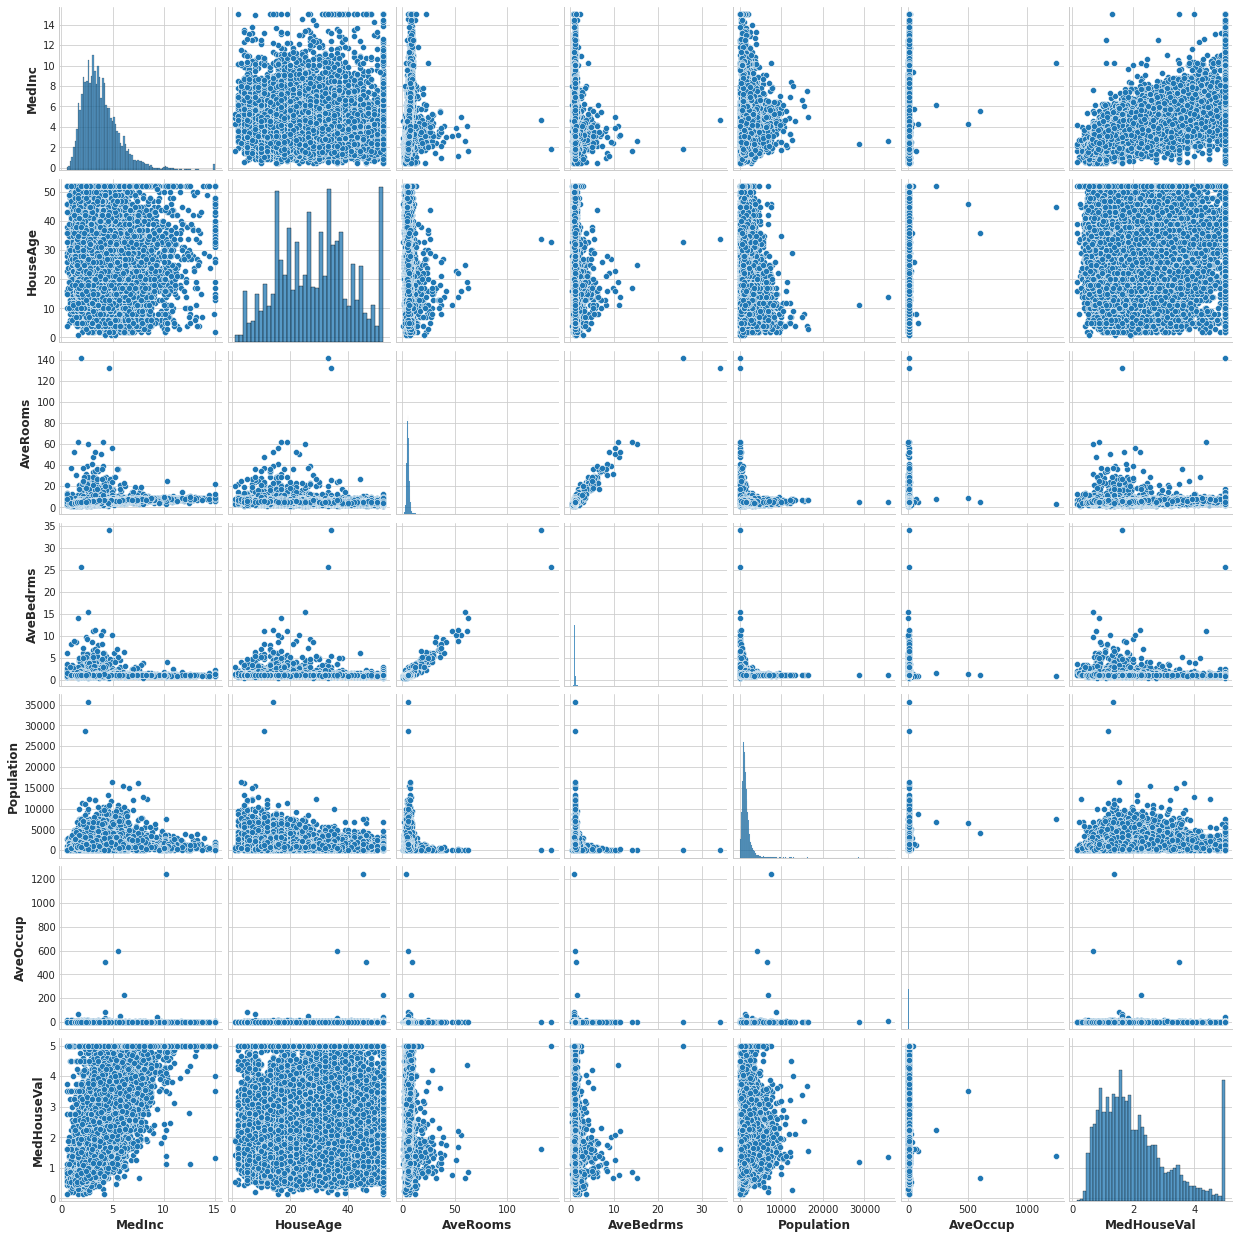

In [28]:
'''sns.pairplot
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexibility.

'''
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']])

# 공분산 확인

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
 9   intercept    20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [1]:
df.describe()

NameError: name 'df' is not defined

In [27]:
df['intercept'] = 1
im = ms.OLS(df['MedHouseVal'], df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
rst = im.fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          2.766e+04
Date:                Tue, 18 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:26:47   Log-Likelihood:                         -24361.
No. Observations:               20640   AIC:                                  4.873e+04
Df Residuals:                   20634   BIC:                                  4.878e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5028      0.004    141.855      0.000       0.496       0.510
HouseAge       0.0119      0.000     32.640      0.000       0.011       0.013
AveRooms      -0.1904      0.006    -32.306      0.000      -0.202      -0.179
AveBedrms      0.7917      0.027     29.531      0.000       0.739       0.844
Population -1.409e-05   4.59e-06     -3.069      0.002   -2.31e-05   -5.09e-06
AveOccup      -0.0049      0.001     -9.307      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     5223.285   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20029.057
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       7.161   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>
bedRoom 과 BathRoom과 상관관계는 높지만 VIF는 안 높다. ==> 상관관계 높아도 다중공선성은 상관없다?

In [32]:
'''
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
'''


# dmatrices가 원하는 변수만을 matrix 형태로 만들어준 것
y,X = dmatrices('MedHouseVal ~ AveRooms + AveBedrms', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif

,VIF,feature
0,6.547793,Intercept
1,3.551917,AveRooms
2,3.551917,AveBedrms


'AveBedrms' 삭제 후는 어떨까?
 - 산점도/corr에 의하면 bathroom과 bedroom 상관관계 있으므로 둘 중 하나를 빼줌


In [34]:


df['intercept'] = 1
im = ms.OLS(df['MedHouseVal'], df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']])
rst = im.fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          3.168e+04
Date:                Tue, 18 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:45:38   Log-Likelihood:                         -24788.
No. Observations:               20640   AIC:                                  4.959e+04
Df Residuals:                   20635   BIC:                                  4.963e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4416      0.003    150.436      0.000       0.436       0.447
HouseAge       0.0171      0.000     52.919      0.000       0.017       0.018
AveRooms      -0.0276      0.002    -12.972      0.000      -0.032      -0.023
Population  2.427e-05   4.49e-06      5.401      0.000    1.55e-05    3.31e-05
AveOccup      -0.0047      0.001     -8.688      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     4514.402   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11972.279
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       5.891   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MI 
- sklearn에서는 타깃변수와 독립변수간의 MI를 계산하는 함수 제공

In [25]:
from sklearn.feature_selection import mutual_info_regression

'''make_mi_scores
Docstring:
Estimate mutual information for a continuous target variable.

Mutual information (MI) [1]_ between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation
from k-nearest neighbors distances as described in [2]_ and [3]_. Both
methods are based on the idea originally proposed in [4]_.

It can be used for univariate features selection, read more in the
:ref:`User Guide <univariate_feature_selection>`.
'''

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [37]:
X = df.copy()
y = X.pop('MedHouseVal')
make_mi_scores(X,y,'auto')

Longitude     0.401730
MedInc        0.387977
Latitude      0.369039
AveRooms      0.103143
AveOccup      0.071858
HouseAge      0.034220
AveBedrms     0.024591
Population    0.021885
intercept     0.000000
Name: MI Scores, dtype: float64

In [51]:
from sklearn.cluster import KMeans

X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]

kmeans = KMeans(n_clusters=6)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')
X.head()


,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,4


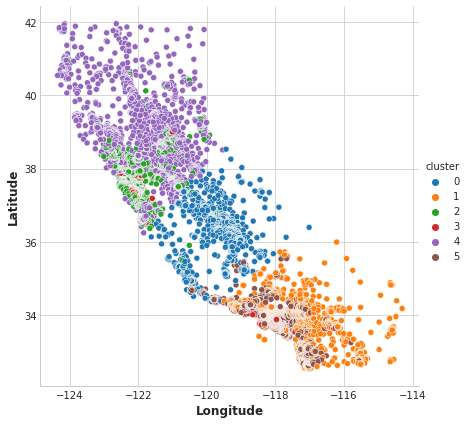

In [52]:
sns.relplot(x='Longitude', y='Latitude', hue='cluster', data=X, height=6)

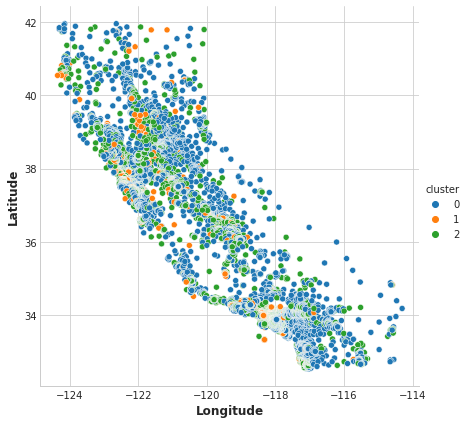

In [54]:
X = df.loc[:, ["HouseAge", "Latitude", "Longitude"]]

kmeans = KMeans(n_clusters=3)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')
#X.head()
sns.relplot(x='Longitude', y='Latitude', hue='cluster', data=X, height=6)

In [59]:
df['MedHouseVal']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [55]:
df_ = df.join(other=X['cluster'])

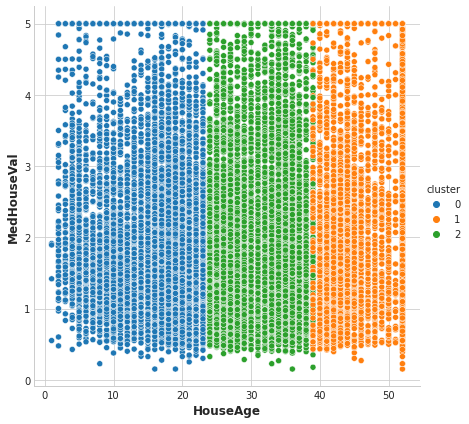

In [56]:
sns.relplot(x='HouseAge', y='MedHouseVal',hue='cluster', data=df_, height=6)

In [ ]:
df = pd.read_csv('git/ML/data/house_prices_advanced/test.csv')
df.head()